Loading sea level data...
Dataset shape: (144, 5)
Columns: ['Year', 'CSIRO Adjusted Sea Level', 'Lower Error Bound', 'Upper Error Bound', 'NOAA Adjusted Sea Level']
First few rows:
   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  

Linear regression results:
Slope: nan inches per year
Y-intercept: nan inches
R-squared: nan
P-value: nan

Linear regression results (2000 onwards):
Slope: nan inches per year
Y-intercept: nan 

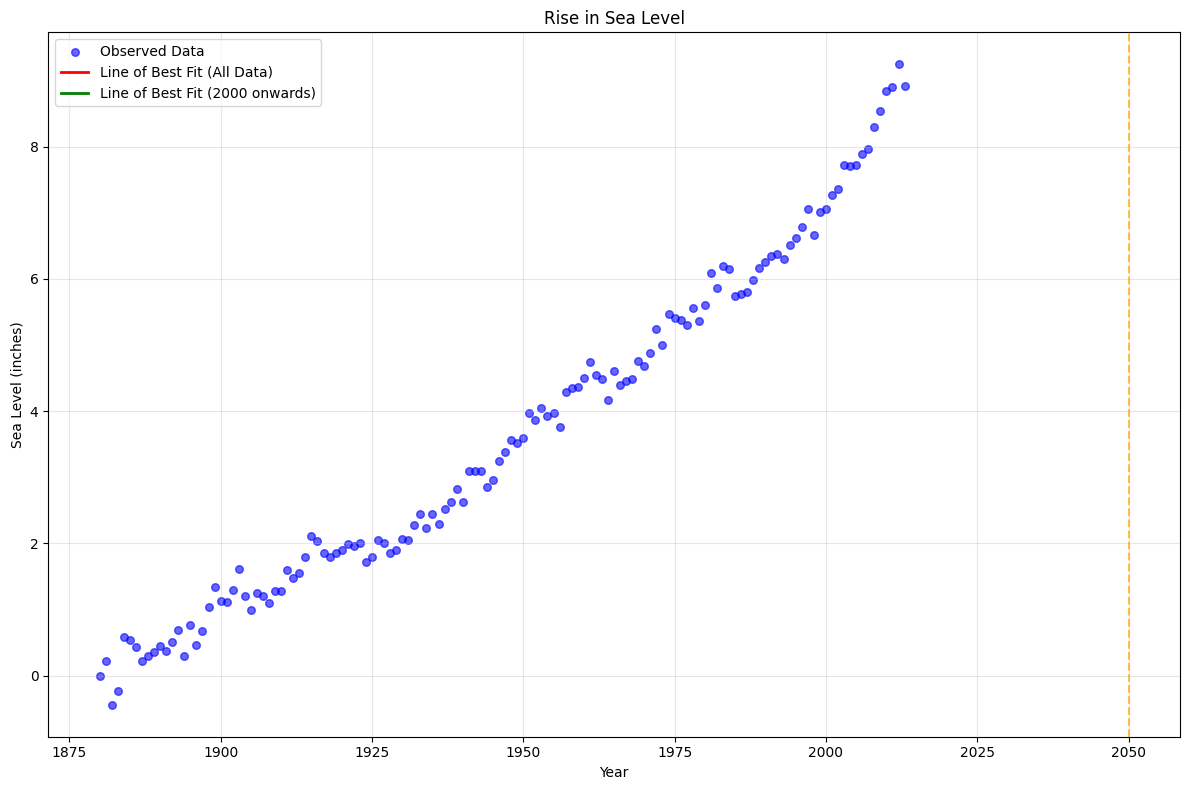


Additional Analysis:
Data range: 1880 to 2023
Total sea level rise in dataset: 9.69 inches
Average annual rise (all data): nan inches/year
Average annual rise (2000+): nan inches/year

95% Confidence Interval for 2050 prediction (all data):
Prediction: nan ± nan inches
Range: nan to nan inches

Script completed successfully!
Plot saved as 'sea_level_analysis.png'


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy import stats

# Task 1: Import the data using Pandas
print("Loading sea level data...")
df = pd.read_csv("C:/Users/Mehak/Downloads/epa-sea-level.csv")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"First few rows:\n{df.head()}")

# Task 2: Create scatter plot with Year vs CSIRO Adjusted Sea Level
plt.figure(figsize=(12, 8))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], alpha=0.6, s=30, color='blue', label='Observed Data')

# Task 3: Use linregress to get slope and y-intercept for line of best fit
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
print(f"\nLinear regression results:")
print(f"Slope: {slope:.6f} inches per year")
print(f"Y-intercept: {intercept:.6f} inches")
print(f"R-squared: {r_value**2:.6f}")
print(f"P-value: {p_value:.2e}")

# Create line of best fit extending to 2050
years_extended = np.arange(df['Year'].min(), 2051)
line_of_best_fit = slope * years_extended + intercept
plt.plot(years_extended, line_of_best_fit, 'r-', linewidth=2, label='Line of Best Fit (All Data)')

# Task 4: Create line of best fit using only data from 2000 onwards
df_2000_onwards = df[df['Year'] >= 2000]
slope_2000, intercept_2000, r_value_2000, p_value_2000, std_err_2000 = linregress(
    df_2000_onwards['Year'], df_2000_onwards['CSIRO Adjusted Sea Level']
)

print(f"\nLinear regression results (2000 onwards):")
print(f"Slope: {slope_2000:.6f} inches per year")
print(f"Y-intercept: {intercept_2000:.6f} inches")
print(f"R-squared: {r_value_2000**2:.6f}")
print(f"P-value: {p_value_2000:.2e}")

# Create line of best fit for 2000+ data extending to 2050
line_of_best_fit_2000 = slope_2000 * years_extended + intercept_2000
plt.plot(years_extended, line_of_best_fit_2000, 'g-', linewidth=2, 
         label='Line of Best Fit (2000 onwards)')

# Task 5: Format the plot with proper labels and title
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()
plt.grid(True, alpha=0.3)

# Add vertical line at 2050 for reference
plt.axvline(x=2050, color='orange', linestyle='--', alpha=0.7, label='2050 Projection')

# Highlight the difference in predictions for 2050
prediction_all_data = slope * 2050 + intercept
prediction_2000_data = slope_2000 * 2050 + intercept_2000

print(f"\nPredictions for 2050:")
print(f"Using all data: {prediction_all_data:.2f} inches")
print(f"Using 2000+ data: {prediction_2000_data:.2f} inches")
print(f"Difference: {abs(prediction_all_data - prediction_2000_data):.2f} inches")

# Add text annotations for 2050 predictions
plt.annotate(f'2050 Prediction (All Data): {prediction_all_data:.1f}"', 
             xy=(2050, prediction_all_data), xytext=(2030, prediction_all_data + 1),
             arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
             fontsize=10, ha='center')

plt.annotate(f'2050 Prediction (2000+ Data): {prediction_2000_data:.1f}"', 
             xy=(2050, prediction_2000_data), xytext=(2030, prediction_2000_data - 1),
             arrowprops=dict(arrowstyle='->', color='green', alpha=0.7),
             fontsize=10, ha='center')

plt.tight_layout()

# Save the plot
plt.savefig('sea_level_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional analysis
print(f"\nAdditional Analysis:")
print(f"Data range: {df['Year'].min()} to {df['Year'].max()}")
print(f"Total sea level rise in dataset: {df['CSIRO Adjusted Sea Level'].max() - df['CSIRO Adjusted Sea Level'].min():.2f} inches")
print(f"Average annual rise (all data): {slope:.4f} inches/year")
print(f"Average annual rise (2000+): {slope_2000:.4f} inches/year")

# Calculate confidence intervals for predictions
from scipy import stats
alpha = 0.05  # 95% confidence interval
df_residuals = len(df) - 2
t_val = stats.t.ppf(1 - alpha/2, df_residuals)

# Standard error of prediction for 2050
x_2050 = 2050
x_mean = df['Year'].mean()
sxx = np.sum((df['Year'] - x_mean)**2)
se_pred = std_err * np.sqrt(1 + 1/len(df) + (x_2050 - x_mean)**2/sxx)
margin_error = t_val * se_pred

print(f"\n95% Confidence Interval for 2050 prediction (all data):")
print(f"Prediction: {prediction_all_data:.2f} ± {margin_error:.2f} inches")
print(f"Range: {prediction_all_data - margin_error:.2f} to {prediction_all_data + margin_error:.2f} inches")

print(f"\nScript completed successfully!")
print(f"Plot saved as 'sea_level_analysis.png'")